number of rows = 10000
number of cols or features  = 11
Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.6540 - accuracy: 0.6151
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7984
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8072
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8140
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8180
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8244
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8325
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8380
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8460
Epoch 10/100
235/235 [=============

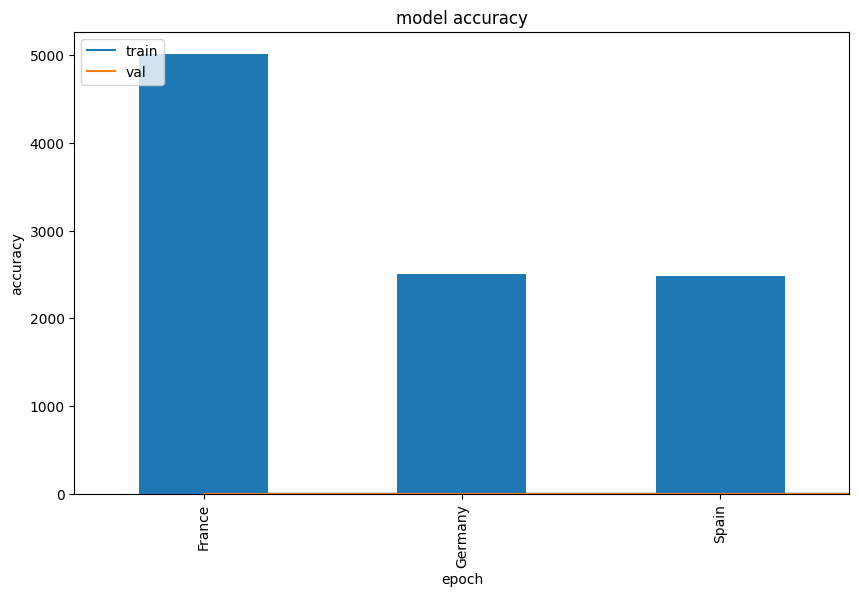

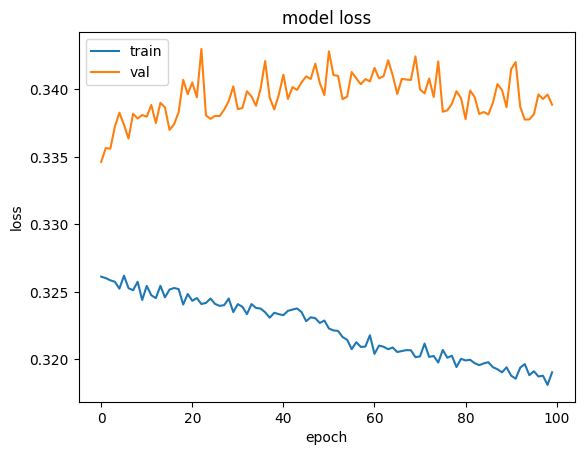

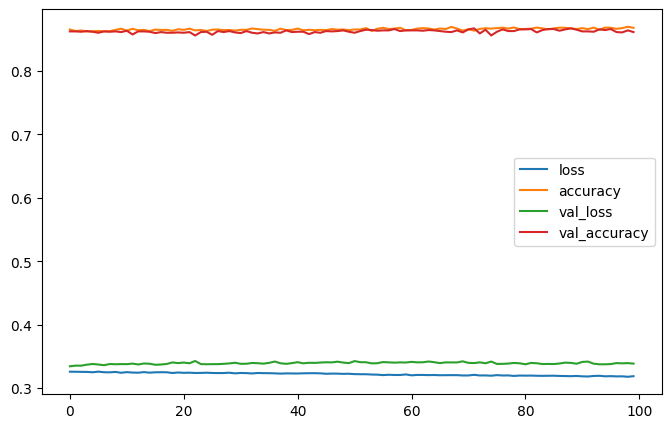

79/79 [==============================] - 0s 1ms/step


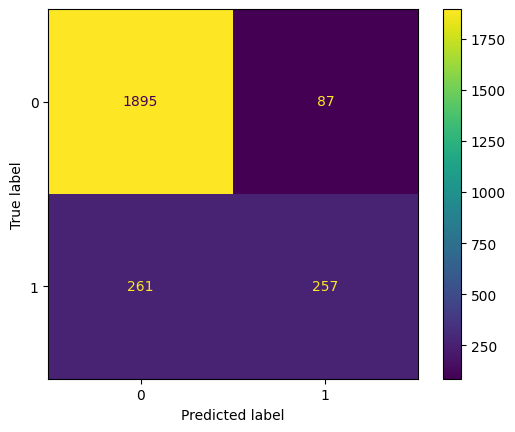

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data
data =pd.read_csv('Churn_Modelling.csv')
#printing first 5 rows


data.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )
#exploring the columns

data.isnull().sum()

#explore number of rows & features
print('number of rows = {}'.format(data.shape[0]))
print('number of cols or features  = {}'.format(data.shape[1]))

plt.figure(figsize=(10, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

data= pd.get_dummies(data, columns= ['Geography', 'Gender'], drop_first=True)
X=data.drop(columns=['Exited'])
y=data['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train.shape

import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(6, activation='relu',input_dim=11),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

model.evaluate(X_test,y_test)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print('accuracy on test data = {}'.format(test_acc))

train_pre=model.predict(X_train)
train_pre = (train_pre>0.5)
train_acc=accuracy_score(y_train,train_pre)
print('accuracy on test data = {}'.format(train_acc))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_metric, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()